In [1]:
import sys
sys.path.append('../')

In [2]:
from torch import nn
import os
import numpy as np
from torch.utils.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

from training.dataset_preparator import DatasetLibriSpeech, VocabPreparatorLibriSpeech
from conformer_modules.conformer_transducer import ConformerTransducer

In [3]:
dir_path = '../dataset/LibriSpeech/dev-clean'
data_split = [0.8, 0, 0.2]
max_len_recording = 1024
max_len_text = 103
batch_size = 10

In [4]:
vocab_preparator = VocabPreparatorLibriSpeech()
vocab = vocab_preparator.prepare_vocab(dir_path)

In [5]:
all_transcript_paths = [
                os.path.join(d, x)
                for d, dirs, files in os.walk(dir_path)
                for x in files
                if "trans.txt" in x
            ]

train_transcript_paths, _, test_transcript_paths = np.split(all_transcript_paths, [int(len(all_transcript_paths)*data_split[0]), int(len(all_transcript_paths)*(data_split[0]+data_split[1]))])

print('N of train transcripts:', len(train_transcript_paths))
print('N of test transcripts:', len(test_transcript_paths))



dataset_train = DatasetLibriSpeech(dir_path=dir_path, transcript_paths=train_transcript_paths[:2], max_len_recording=max_len_recording, max_len_text=max_len_text, vocab=vocab, verbose=True)
dataset_test = DatasetLibriSpeech(dir_path=dir_path, transcript_paths=test_transcript_paths, max_len_recording=max_len_recording, max_len_text=max_len_text, vocab=vocab, verbose=True)

dataloader_train =  DataLoader(dataset=dataset_train,
                              batch_size=batch_size,
                              shuffle=True,
                             num_workers=0)

dataloader_test =  DataLoader(dataset=dataset_test,
                                batch_size=batch_size,
                                shuffle=False,
                                 num_workers=0)

vocab_size = len(vocab)

N of train transcripts: 77
N of test transcripts: 20
Dataset prepared
X shape: torch.Size([13, 1024, 80])
y shape: torch.Size([13, 103])
Dataset prepared
X shape: torch.Size([255, 1024, 80])
y shape: torch.Size([255, 103])


In [6]:
for x,y in dataloader_train:
    print(x.shape, y.shape)
    break

torch.Size([10, 1024, 80]) torch.Size([10, 103])


In [7]:
model = ConformerTransducer(vocab_size=vocab_size)
pred_y = model(x)

In [8]:
print(vocab_preparator.tokens_to_text(y[0]))
print(vocab_preparator.tokens_to_text(np.argmax(pred_y[0].detach().numpy(), axis=1)))

there was also another cause <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
diminished supreme winters leaped lessened cries washington offers educating surface surnamed obeying aghast surface surface glanced bewildered wrists wrists keeps roast roast truck existence existence intimate intimate introduced introduced introduced freedom freedom freedom introduced freedom hustling accuracy truck freedom introduced introduced introduced introduced introduced 

In [9]:
model.train()
loss = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

n_epochs = 600

In [10]:
loss_values = []

for epoch_n in tqdm(range(n_epochs)):
    for x, y in dataloader_train:
        optimizer.zero_grad()
        pred_y = model(x)
        loss_value = loss(pred_y.permute(0, 2, 1), y)
        loss_value.backward()
        optimizer.step()

        loss_values.append(loss_value.item())

 90%|████████▉ | 538/600 [10:49<01:12,  1.17s/it]

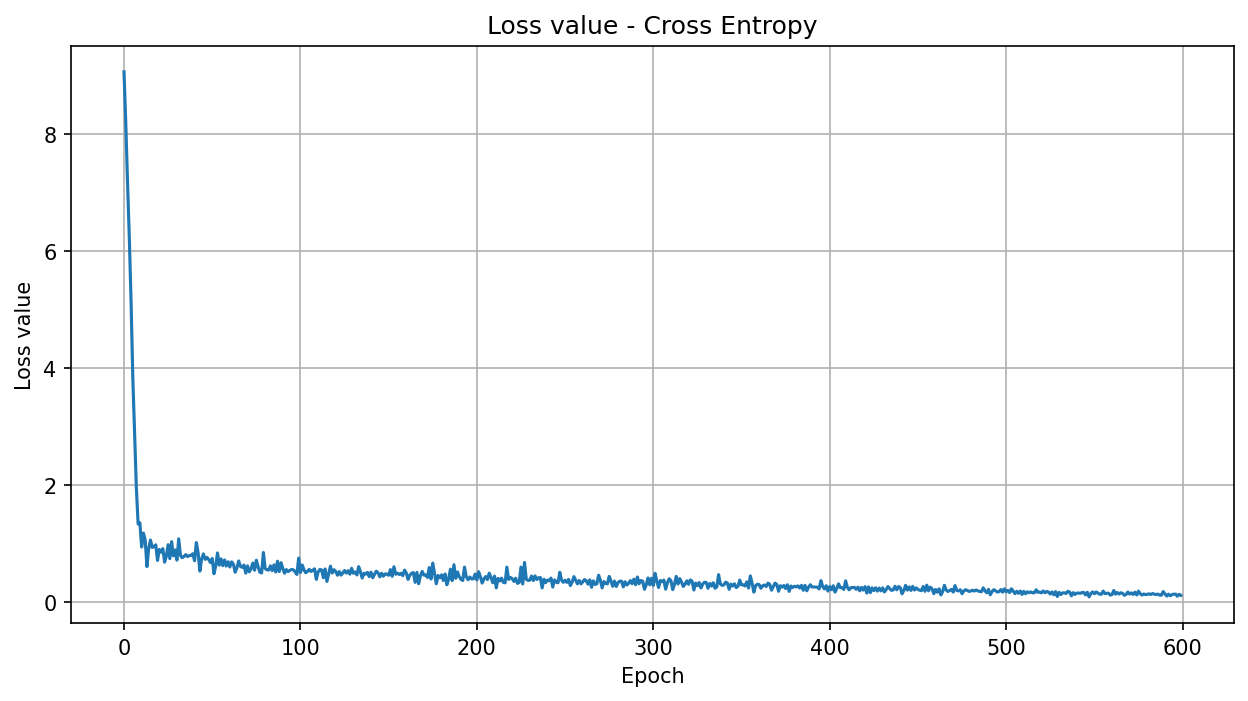

In [ ]:
fig, axs = plt.subplots(figsize=(10,5), dpi=150)
axs.set_title('Loss value - Cross Entropy')
axs.set_xlabel('Epoch')
axs.set_ylabel('Loss value')
axs.grid()
axs.plot(loss_values)

In [ ]:
for x,y in dataloader_train:
    for i in range(len(x)):
        print(vocab_preparator.tokens_to_text(y[i]))
        print(vocab_preparator.tokens_to_text(np.argmax(model(x)[i].detach().numpy(), axis=1)))
        print('')

i saw a few sheep with rounded noses and enormous tails <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
the streets were narrow but unpaved the pleasure and enormous tails <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> 